In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/seminar/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1944 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

61

here it is total lenght of batch i.e there is 61 batches nd each abtch contain 32 images which is 61*32

In [ ]:
for image_batch , label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())


(32, 256, 256, 3)
[0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1]


In [ ]:
for image_batch , label_batch in dataset.take(1):
  print(image_batch[0].numpy()) #convert it to numpy as it is tensor


[[[119. 114. 121.]
  [140. 135. 142.]
  [145. 140. 147.]
  ...
  [186. 183. 190.]
  [184. 181. 188.]
  [183. 180. 187.]]

 [[131. 126. 133.]
  [131. 126. 133.]
  [151. 146. 153.]
  ...
  [190. 187. 194.]
  [189. 186. 193.]
  [189. 186. 193.]]

 [[116. 111. 118.]
  [127. 122. 129.]
  [156. 151. 158.]
  ...
  [191. 188. 195.]
  [191. 188. 195.]
  [190. 187. 194.]]

 ...

 [[148. 143. 150.]
  [136. 131. 138.]
  [173. 168. 175.]
  ...
  [193. 190. 197.]
  [193. 190. 197.]
  [193. 190. 197.]]

 [[162. 157. 164.]
  [135. 130. 137.]
  [166. 161. 168.]
  ...
  [195. 192. 199.]
  [196. 193. 200.]
  [196. 193. 200.]]

 [[149. 144. 151.]
  [116. 111. 118.]
  [179. 174. 181.]
  ...
  [196. 193. 200.]
  [197. 194. 201.]
  [198. 195. 202.]]]


#**Visualization**

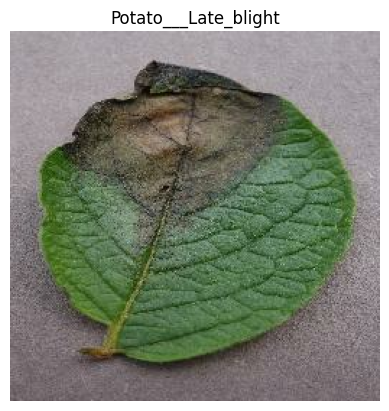

In [ ]:
for image_batch , label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(class_names[label_batch[0]])
  plt.axis('off')

<ipython-input-9-8aa450a42303>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,i+1)


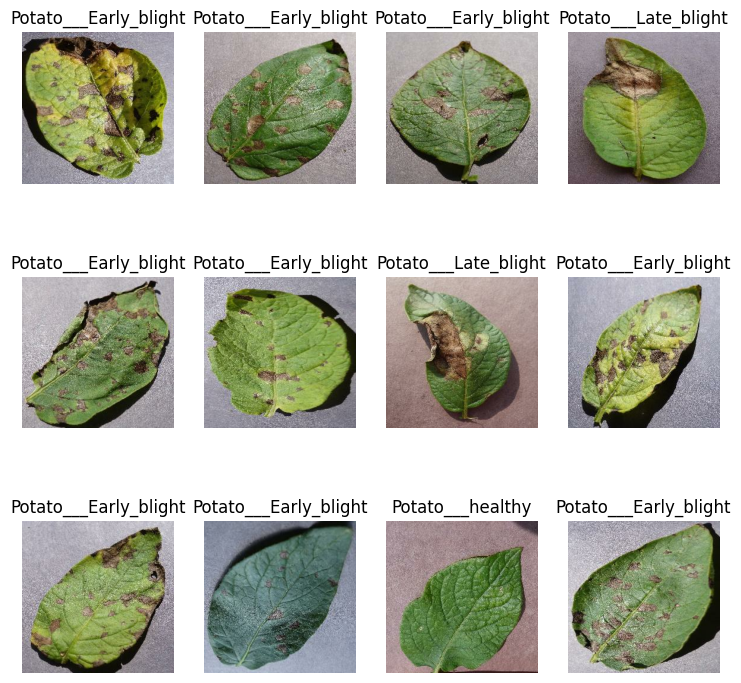

In [ ]:
plt.subplots(figsize=(9, 9))
for image_batch , label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')



> 80%==>Training

> 20%==>10% validation , 10% test






In [ ]:
train_size=0.8
len(dataset)*train_size

48.800000000000004

In [ ]:
train_ds=dataset.take(49)
len(train_ds)

49

In [ ]:
test_ds=dataset.skip(49)
len(test_ds)


12

In [ ]:
val_size=0.1
len(dataset)*val_size

6.1000000000000005

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

6

In [ ]:
def get_data_partition(ds , train_split=0.8 , val_split=0.1 , test_split=0.1,shuffle=True , shuffle_size=10000):

  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)



  return train_ds , val_ds , test_ds

In [ ]:
train_ds , val_ds , test_ds=get_data_partition(dataset)

In [ ]:
len(train_ds)

48

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

7

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Resizing & Rescaling

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255) #here 1.0 shows ivision operation is performed as a floating-point division rather than integer division

])

# **Data Augmentation**


In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.3)
])

# **Model Building**

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
model= keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
48/48 [==============================] - 437s 234ms/step - loss: 0.8476 - accuracy: 0.6073 - val_loss: 0.8884 - val_accuracy: 0.7031
Epoch 2/50
48/48 [==============================] - 3s 62ms/step - loss: 0.5132 - accuracy: 0.8109 - val_loss: 0.4255 - val_accuracy: 0.8385
Epoch 3/50
48/48 [==============================] - 3s 65ms/step - loss: 0.3319 - accuracy: 0.8750 - val_loss: 0.2383 - val_accuracy: 0.9010
Epoch 4/50
48/48 [==============================] - 3s 63ms/step - loss: 0.2838 - accuracy: 0.8842 - val_loss: 0.1772 - val_accuracy: 0.9323
Epoch 5/50
48/48 [==============================] - 3s 62ms/step - loss: 0.2165 - accuracy: 0.9077 - val_loss: 0.1590 - val_accuracy: 0.9219
Epoch 6/50
48/48 [==============================] - 3s 64ms/step - loss: 0.1814 - accuracy: 0.9332 - val_loss: 0.1310 - val_accuracy: 0.9583
Epoch 7/50
48/48 [==============================] - 3s 63ms/step - loss: 0.1788 - accuracy: 0.9306 - val_loss: 0.1391 - val_accuracy: 0.9583
Epoch 8/50

In [ ]:
scores=model.evaluate(test_ds)

7/7 [==============================] - 6s 28ms/step - loss: 0.0263 - accuracy: 0.9955


## **Plotting Accuracy and Loss**

In [ ]:
history

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

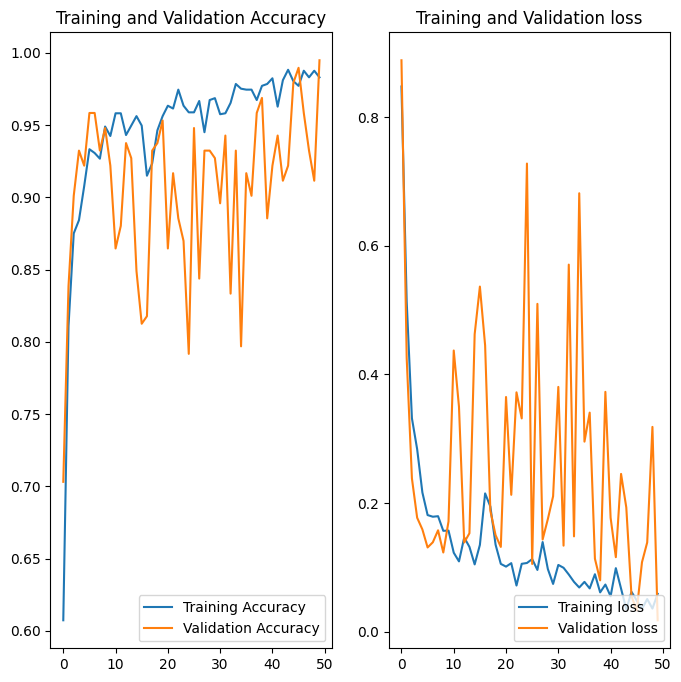

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='Training Accuracy')
plt.plot(range(50),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50),loss,label='Training loss')
plt.plot(range(50),val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

as epoch increase accuracy increases and loss decreases


First image to predict
actual label :  Potato___Late_blight
1/1 [==============================] - 0s 214ms/step
predicted label :  Potato___Early_blight


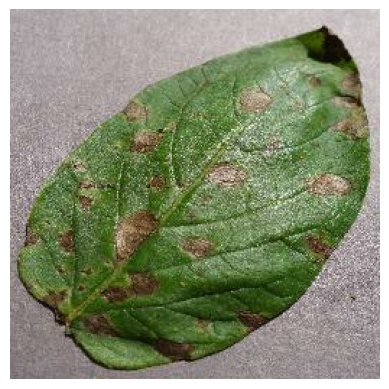

In [ ]:
for images_batch , label_batch in test_ds.take(1):
  first_image=image_batch[1].numpy().astype('uint8')
  first_label=label_batch[1].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  plt.axis("off")
  print("actual label : ", class_names[first_label])

  batch_prediction=model.predict(image_batch)
  print("predicted label : ",class_names[np.argmax(batch_prediction[1])])

In [ ]:


import numpy as np


def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


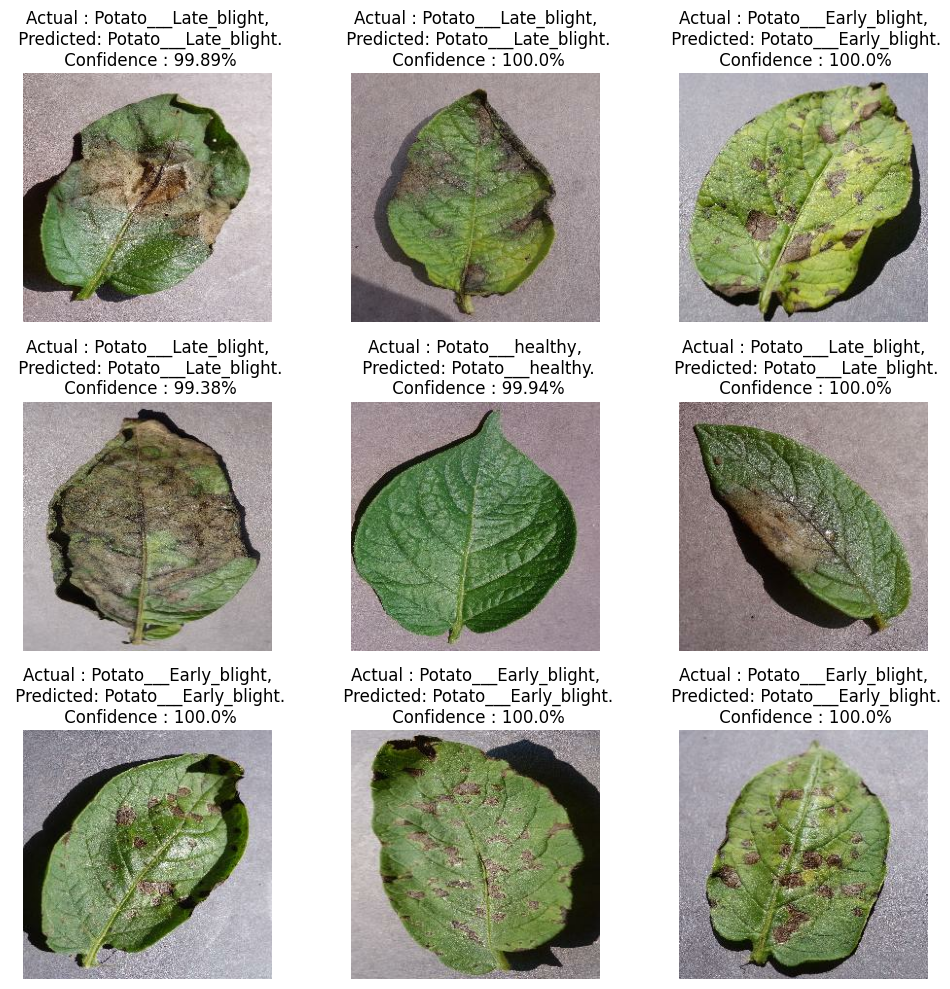

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}.\n Confidence : {confidence}%")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
model_version=1
model.save(f"../models/")

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model pre-trained on ImageNet, excluding the top layer
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional base layers to retain learned features
vgg16_base.trainable = False

# Add new fully-connected layers for plant disease classification
x = vgg16_base.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create the final model with the pre-trained base and new layers
model = Model(inputs=vgg16_base.input, outputs=predictions)

# Compile the model for training on your PlantVillage dataset
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using your defined training and validation data (train_ds, val_ds)
history2 = model.fit(train_ds,
                    epochs=20,  # Adjust the number of epochs as needed
                    batch_size=32,
                    validation_data=val_ds)

# Evaluate the model's performance on your test data (test_ds)
scores = model.evaluate(test_ds)
print("Test accuracy:", scores[1])

# # Save the trained model (optional)
# model_version = 1
# model.save(f"plant_disease_classifier_{model_version}.h5")


58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/20
48/48 [==============================] - 25s 333ms/step - loss: 4.0699 - accuracy: 0.8318 - val_loss: 0.5708 - val_accuracy: 0.9688
Epoch 2/20
48/48 [==============================] - 10s 200ms/step - loss: 0.4563 - accuracy: 0.9640 - val_loss: 0.3753 - val_accuracy: 0.9896
Epoch 3/20
48/48 [==============================] - 9s 196ms/step - loss: 0.3358 - accuracy: 0.9791 - val_loss: 0.0910 - val_accuracy: 0.9792
Epoch 4/20
48/48 [==============================] - 9s 193ms/step - loss: 0.1390 - accuracy: 0.9830 - val_loss: 0.4860 - val_accuracy: 0.9792
Epoch 5/20
48/48 [==============================] - 9s 193ms/step - loss: 0.1099 - accuracy: 0.9869 - val_loss: 0.1968 - val_accuracy: 0.9896
Epoch 6/20
48/48 [==============================] - 9s 191ms/step - loss: 0.2271 - accuracy: 0.9843 - val_loss: 0.3426 - val_accuracy: 0.9896
Epoch 7/20
48/48 [==============================] - 9s 191ms/step - loss: 0.1217 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3

# Load your dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/seminar/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Get class names
class_names = dataset.class_names

# Split dataset into training, validation, and test sets
def get_data_partition(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_data_partition(dataset)

# Data preprocessing and augmentation
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.3)
])

# Define the first model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
model1 = keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model1.build(input_shape=input_shape)

model1.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the first model
history1 = model1.fit(
    train_ds,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Found 1944 files belonging to 3 classes.
Epoch 1/20
48/48 [==============================] - 23s 203ms/step - loss: 0.8522 - accuracy: 0.5668 - val_loss: 1.2610 - val_accuracy: 0.6510
Epoch 2/20
48/48 [==============================] - 15s 202ms/step - loss: 0.5246 - accuracy: 0.8043 - val_loss: 1.2895 - val_accuracy: 0.6033
Epoch 3/20
48/48 [==============================] - 15s 197ms/step - loss: 0.4731 - accuracy: 0.8128 - val_loss: 0.8133 - val_accuracy: 0.7292
Epoch 4/20
48/48 [==============================] - 15s 174ms/step - loss: 0.4692 - accuracy: 0.8197 - val_loss: 0.5758 - val_accuracy: 0.7969
Epoch 5/20
48/48 [==============================] - 14s 180ms/step - loss: 0.3809 - accuracy: 0.8423 - val_loss: 0.4421 - val_accuracy: 0.8490
Epoch 6/20
48/48 [==============================] - 14s 189ms/step - loss: 0.3073 - accuracy: 0.8626 - val_loss: 0.3181 - val_accuracy: 0.8913
Epoch 7/20
48/48 [==============================] - 15s 195ms/step - loss: 0.2534 - accuracy: 0.8979 

In [ ]:
# Define and train the second model (VGG16-based)
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
vgg16_base.trainable = False

x = vgg16_base.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model2 = Model(inputs=vgg16_base.input, outputs=predictions)

model2.compile(optimizer=Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(train_ds,
                      epochs=20,
                      batch_size=32,
                      validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 24s 335ms/step - loss: 4.5469 - accuracy: 0.8344 - val_loss: 0.5805 - val_accuracy: 0.9457
Epoch 2/20
48/48 [==============================] - 24s 394ms/step - loss: 0.4790 - accuracy: 0.9575 - val_loss: 0.0497 - val_accuracy: 0.9896
Epoch 3/20
48/48 [==============================] - 22s 333ms/step - loss: 0.4533 - accuracy: 0.9647 - val_loss: 0.0625 - val_accuracy: 0.9896
Epoch 4/20
48/48 [==============================] - 22s 332ms/step - loss: 0.2285 - accuracy: 0.9805 - val_loss: 0.0395 - val_accuracy: 0.9896
Epoch 5/20
48/48 [==============================] - 22s 335ms/step - loss: 0.2269 - accuracy: 0.9837 - val_loss: 0.0079 - val_accuracy: 0.9948
Epoch 6/20
48/48 [==============================] - 20s 302ms/step - loss: 0.1921 - accuracy: 0.9836 - val_loss: 2.0030e-05 - val_accuracy: 1.0000
Epoch 7/20
48/48 [==============================] - 21s 313ms/step - loss: 0.0988 - accuracy: 0.9895 - val_loss: 3.2907e-08 - val_accuracy

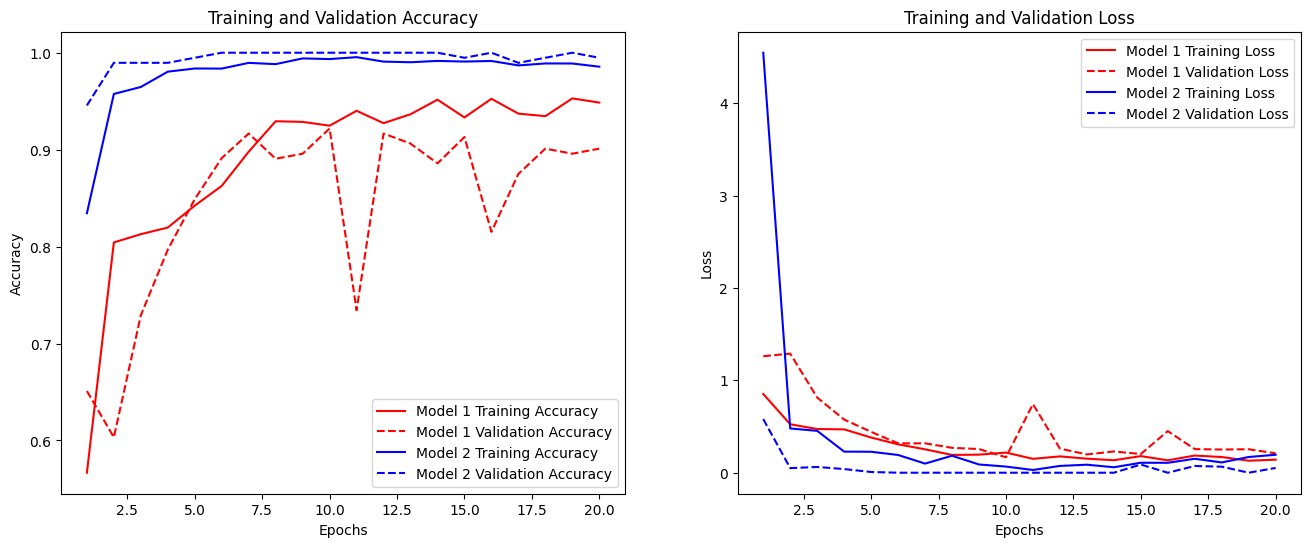

In [ ]:
# Plotting Accuracy and Loss for both models
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, 21)  # assuming 20 epochs were trained for both models

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc1, 'r', label='Model 1 Training Accuracy')
plt.plot(epochs, val_acc1, 'r--', label='Model 1 Validation Accuracy')
plt.plot(epochs, acc2, 'b', label='Model 2 Training Accuracy')
plt.plot(epochs, val_acc2, 'b--', label='Model 2 Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss1, 'r', label='Model 1 Training Loss')
plt.plot(epochs, val_loss1, 'r--', label='Model 1 Validation Loss')
plt.plot(epochs, loss2, 'b', label='Model 2 Training Loss')
plt.plot(epochs, val_loss2, 'b--', label='Model 2 Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

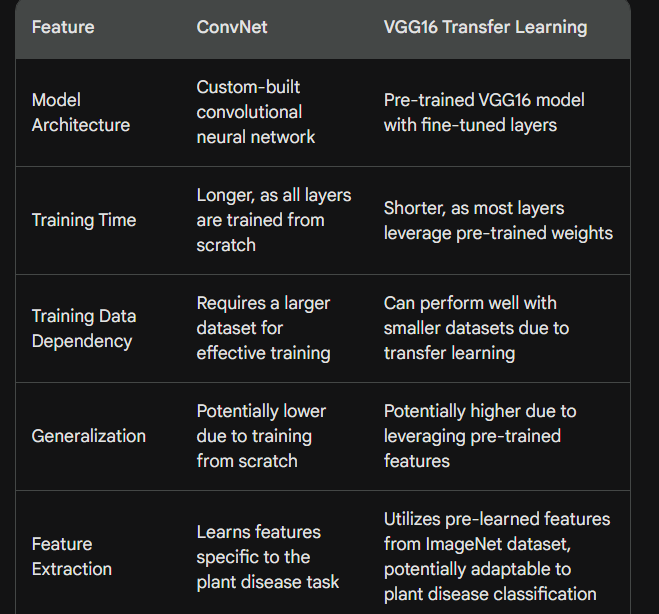

In [ ]:
# Your plotting code

plt.savefig('accuracy_and_loss_plot.png')  # Save the plot to a file
plt.show()  # Display the plot (this line is not necessary if you want only to save the plot)


<Figure size 640x480 with 0 Axes>

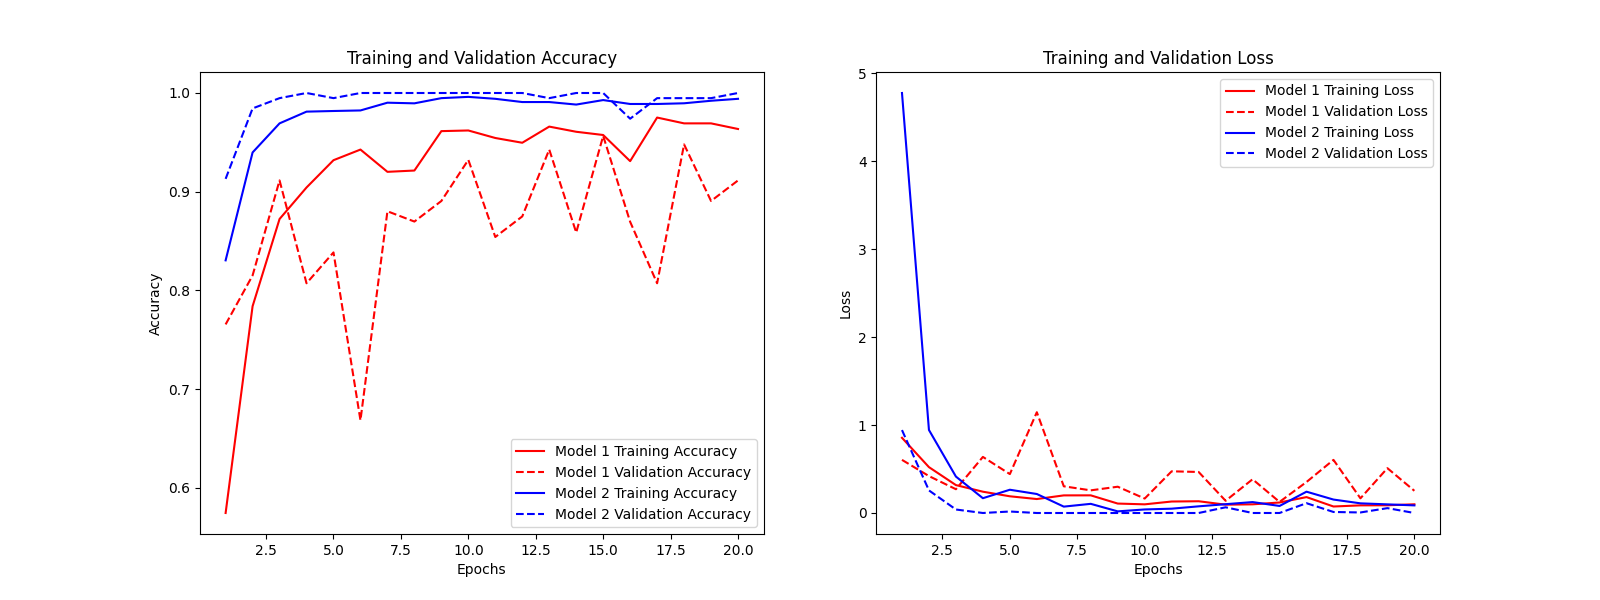

In [ ]:
from google.colab.patches import cv2_imshow

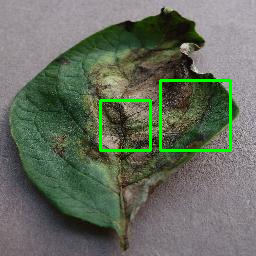

In [ ]:
import cv2

def mark_disease_areas(image, bounding_boxes):
  marked_image = image.copy()
  for box in bounding_boxes:
    x, y, w, h = box
    # Draw bounding box in green with thickness 2
    cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  return marked_image

# Example usage
image_path = "/content/drive/MyDrive/disease/0c2628d4-8d64-48a9-a157-19a9c902e304___RS_LB 4590.JPG"  # Replace with your image path
image = cv2.imread(image_path)

bounding_boxes = [(100, 100, 50, 50), (160, 80, 70, 70)]  # Example bounding boxes

marked_image = mark_disease_areas(image, bounding_boxes)

# Display the marked image with a window title
from google.colab.patches import cv2_imshow
cv2_imshow(marked_image)

# Wait for a key press to close the window (optional)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# import cv2
# import os

# # Function to mark disease areas on an image
# def mark_disease_areas(image, bounding_boxes):
#     marked_image = image.copy()
#     for box in bounding_boxes:
#         x, y, w, h = box
#         # Draw bounding box
#         cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
#     return marked_image

# # Function to process all images in a directory
# def process_images_in_directory(directory_path):
#     for filename in os.listdir(directory_path):
#         if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
#             image_path = os.path.join(directory_path, filename)
#             print(f"Processing image: {image_path}")
#             image = cv2.imread(image_path)
#             if image is None:
#                 print(f"Error: Unable to read image '{image_path}'. Skipping...")
#                 continue
#             # Assume bounding_boxes contains the bounding box coordinates where diseases are detected
#             bounding_boxes = [(100, 100, 50, 50), (200, 150, 70, 70)]  # Example bounding box coordinates
#             marked_image = mark_disease_areas(image, bounding_boxes)
#             # Display the marked image
#             cv2.imshow("Marked Image", marked_image)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()

# # Specify the directory path where your images are located
# directory_path = "/content/drive/MyDrive/disease"  # Replace with the path to your dataset directory
# process_images_in_directory(directory_path)


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to mark disease areas on an image
def mark_disease_areas(image, bounding_boxes):
    marked_image = image.copy()
    for box in bounding_boxes:
        x, y, w, h = box
        # Draw bounding box
        cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return marked_image

# Function to process all images in a directory
def process_images_in_directory(directory_path):
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            print(f"Processing image: {image_path}")
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Unable to read image '{image_path}'. Skipping...")
                continue
            # Assume bounding_boxes contains the bounding box coordinates where diseases are detected
            bounding_boxes = [(100, 100, 50, 50), (200, 150, 70, 70)]  # Example bounding box coordinates
            marked_image = mark_disease_areas(image, bounding_boxes)
            # Display the marked image using matplotlib
            plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

# Specify the directory path where your images are located
directory_path = "/content/drive/MyDrive/disease"  # Replace with the path to your dataset directory
process_images_in_directory(directory_path)
